In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import surfdist as sd
from surfdist import load, analysis, viz, utils
import scipy.spatial


In [2]:
cmap='coolwarm'
base_dir = '/Users/medaglialab/Desktop/geodesic_distance/'
surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.pial'))
cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/label/lh.cortex.label')))
sulc=nib.freesurfer.read_morph_data(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.sulc'))
src  = sd.load.load_freesurfer_label(os.path.join(base_dir, 'TNI009_DP5001/lh_parc_result.annot'), '17Networks_14', cort)

In [3]:
dist = sd.analysis.dist_calc(surf, cort, src)

/Users/medaglialab/Documents/GitHub/surfdist/surfdist/utils.py:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "surf_keep_cortex" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /Users/medaglialab/Documents/GitHub/surfdist/surfdist/utils.py (20)

File "surfdist/utils.py", line 20:
def surf_keep_cortex(surf, cortex):
    <source elided>
    # split surface into vertices and triangles
    vertices, triangles = surf
    ^

  @numba.jit(parallel=True)
/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "surf_keep_cortex" was compiled in object mode without forceobj=True.

File "surfdist/utils.py", line 5:
@numba.jit(parallel=True)
def surf_keep_cortex(surf, cortex):
^

  self.func_ir.loc))
/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation pat

In [4]:
dist

array([52.17030005, 51.70970928, 52.65622176, ..., 39.55994705,
       40.10551362, 42.28295865])

(array([2.0947e+04, 1.0886e+04, 7.0620e+03, 5.7910e+03, 4.9130e+03,
        4.2910e+03, 3.9630e+03, 3.6710e+03, 3.6150e+03, 3.4620e+03,
        3.3700e+03, 3.2300e+03, 3.1510e+03, 3.1540e+03, 3.1490e+03,
        3.1010e+03, 2.9710e+03, 2.7610e+03, 2.5660e+03, 2.4570e+03,
        2.2960e+03, 2.1710e+03, 2.0370e+03, 1.9070e+03, 1.8170e+03,
        1.7560e+03, 1.7100e+03, 1.7510e+03, 1.6420e+03, 1.6270e+03,
        1.6470e+03, 1.5990e+03, 1.5060e+03, 1.4330e+03, 1.4290e+03,
        1.4440e+03, 1.3670e+03, 1.3460e+03, 1.3250e+03, 1.2560e+03,
        1.1840e+03, 1.1370e+03, 1.0650e+03, 1.0580e+03, 1.0180e+03,
        1.0040e+03, 9.7500e+02, 8.5400e+02, 8.2800e+02, 8.1400e+02,
        8.0200e+02, 8.0100e+02, 8.1500e+02, 7.9700e+02, 7.9700e+02,
        7.7900e+02, 7.6400e+02, 6.7800e+02, 6.8000e+02, 6.2600e+02,
        6.2200e+02, 6.2900e+02, 6.0900e+02, 6.1400e+02, 6.1000e+02,
        5.6100e+02, 5.3300e+02, 5.1000e+02, 5.0500e+02, 5.0500e+02,
        5.0500e+02, 4.7300e+02, 4.6000e+02, 4.24

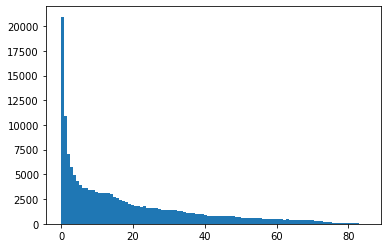

In [5]:
plt.hist(dist, bins=100)